In [1]:
# Code taken from https://medium.com/@thebinayak/unlocking-the-power-of-fast-fourier-transform-fft-with-python-code-b6e2d0c71dc8
from scipy.io import wavfile  # import the libraries for reading sound files
import numpy as np  # import numpy to do the fft
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, fftfreq

In [2]:
figure_width = 7  # inches
figure_height = 3.5  # inches

AUDIO_FILE = "/Users/cemerturkan/Desktop/w/w_2/piano_inter.wav"
PATH = os.getcwd()  # Save the plots in current working directory
# Load the file -get sampling_frequency and the data array
sampling_freq, sound_data = wavfile.read(AUDIO_FILE)
print("Sampling frequency = ", sampling_freq, "\nShape of data array = ", sound_data.shape)

Sampling frequency =  44100 
Shape of data array =  (325662, 2)


/var/folders/q_/nv9cmbv52rx2dhltp0q1l10h0000gn/T/ipykernel_67507/2124855623.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, sound_data = wavfile.read(AUDIO_FILE)


In [3]:
# Determine the maximum values
max_value = np.max(np.abs(sound_data))
print(f'Max Value is {max_value}')
# Use max_value and normalize sound data to get values between -1 & +1
sound_data = sound_data/max_value
# Lets just take a single audio channel (mono) even if it is stereo
if len(sound_data.shape) == 1:
 s1 = sound_data
else:
 s1 = sound_data[:, 0]

Max Value is 232901888


In [4]:
# Get time domain representation of the sound pressure waves
timeArray = np.arange(0, s1.shape[0], 1.0)
timeArray = timeArray / sampling_freq  # Second
timeArray = timeArray * 1000  # Scale to milliseconds

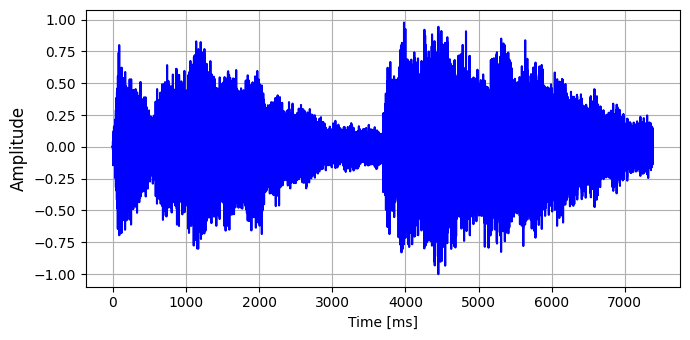

In [22]:
# Plot the sound signal in time domain
plt.figure(figsize=(figure_width, figure_height))
plt.plot(timeArray, sound_data, color='b')

plt.xlabel('Time [ms]')
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
plt.tight_layout()


In [6]:
# Calculate length of the signal
N = len(s1)
Time_period = 1/sampling_freq

yf = fft(s1)  # Perform the Fourier transform
xf = fftfreq(N, Time_period)[:N//2]  # calculate the frequencies in the center of each bin

# Calculate the magnitude of the FFT result
magnitude = np.abs(yf)
# Find the index of the maximum magnitude
max_magnitude_index = np.argmax(magnitude)

# Calculate the corresponding frequency with respect to index and sampling rate
max_frequency = max_magnitude_index * sampling_freq / len(s1)
print("Frequency with highest FFT magnitude:", max_frequency, "Hz")

Frequency with highest FFT magnitude: 391.7598614514435 Hz


In [21]:
xf,2.0/N * np.abs(yf[0:N//2])

2

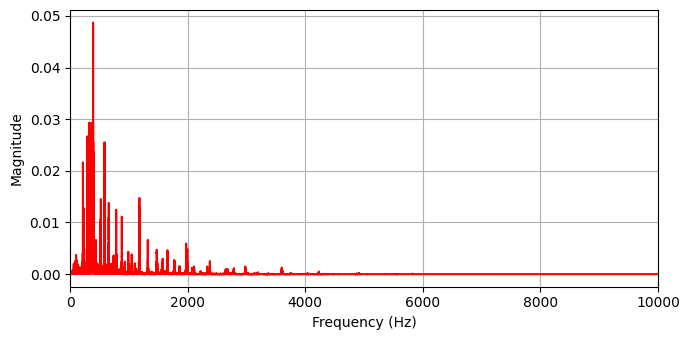

In [23]:
plt.figure(figsize=(figure_width, figure_height))
# Typically only the FFT corresponding to positive frequencies is plotted
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)
plt.grid()
plt.tight_layout()
plt.show()

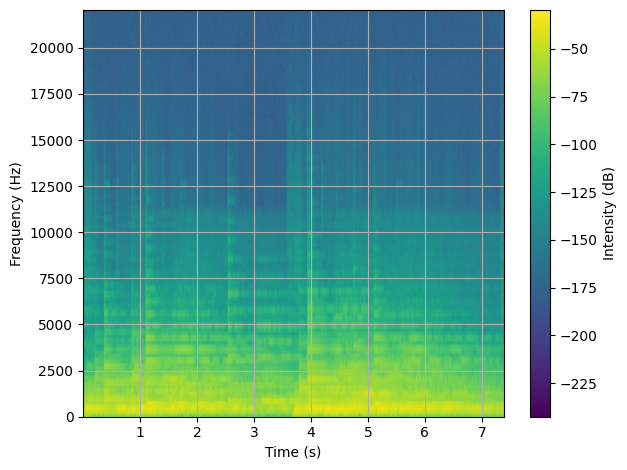

Shape of Pxx (spectrogram data): (129, 2543)
Frequencies array: [    0.         172.265625   344.53125    516.796875   689.0625
   861.328125  1033.59375   1205.859375  1378.125     1550.390625
  1722.65625   1894.921875  2067.1875    2239.453125  2411.71875
  2583.984375  2756.25      2928.515625  3100.78125   3273.046875
  3445.3125    3617.578125  3789.84375   3962.109375  4134.375
  4306.640625  4478.90625   4651.171875  4823.4375    4995.703125
  5167.96875   5340.234375  5512.5       5684.765625  5857.03125
  6029.296875  6201.5625    6373.828125  6546.09375   6718.359375
  6890.625     7062.890625  7235.15625   7407.421875  7579.6875
  7751.953125  7924.21875   8096.484375  8268.75      8441.015625
  8613.28125   8785.546875  8957.8125    9130.078125  9302.34375
  9474.609375  9646.875     9819.140625  9991.40625  10163.671875
 10335.9375   10508.203125 10680.46875  10852.734375 11025.
 11197.265625 11369.53125  11541.796875 11714.0625   11886.328125
 12058.59375  12230.859375 1

In [26]:
# Calculate the spectrogram and get the numerical data
Pxx, freqs, bins, im = plt.specgram(s1, NFFT=256, Fs=sampling_freq, noverlap=128, cmap='viridis')

# Pxx: The power spectral density (intensity values) [shape: (frequencies, time_bins)]
# freqs: The frequencies corresponding to each row in Pxx
# bins: The time points corresponding to each column in Pxx

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.grid()
plt.tight_layout()
plt.show()

# Now you can access the numerical data:
print("Shape of Pxx (spectrogram data):", Pxx.shape)
print("Frequencies array:", freqs)
print("Time bins array:", bins)

In [27]:
freqs.shape

(129,)

In [34]:
Pxx[0].shape

(2543,)